In [1]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

Genres dataset has 164 lines and 4 features.
Echonest dataset has 11440 lines and 8 features.
Tracks dataset has 99995 lines and 13 features.
Spectral dataset has 99995 lines and 21 features.
NA values in each column of genres dataset:
genre_parent_id    13
dtype: int64
NA values in each column of echonest dataset:
danceability     19
speechiness     150
valence          21
dtype: int64
NA values in each column of tracks dataset:
album_title           911
artist_latitude     59788
artist_longitude    59788
genre_top           55362
title                   1
dtype: int64
NA values in each column of spectral dataset:
Series([], dtype: int64)


C:\Users\ajarr\AppData\Local\Temp\ipykernel_15548\4206925099.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=na_pct.values, y=na_pct.index, palette='viridis')
C:\Users\ajarr\AppData\Local\Temp\ipykernel_15548\4206925099.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=na_pct.values, y=na_pct.index, palette='viridis')
C:\Users\ajarr\AppData\Local\Temp\ipykernel_15548\4206925099.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=na_pct.values, y=na_pct.index, palette='viridis')


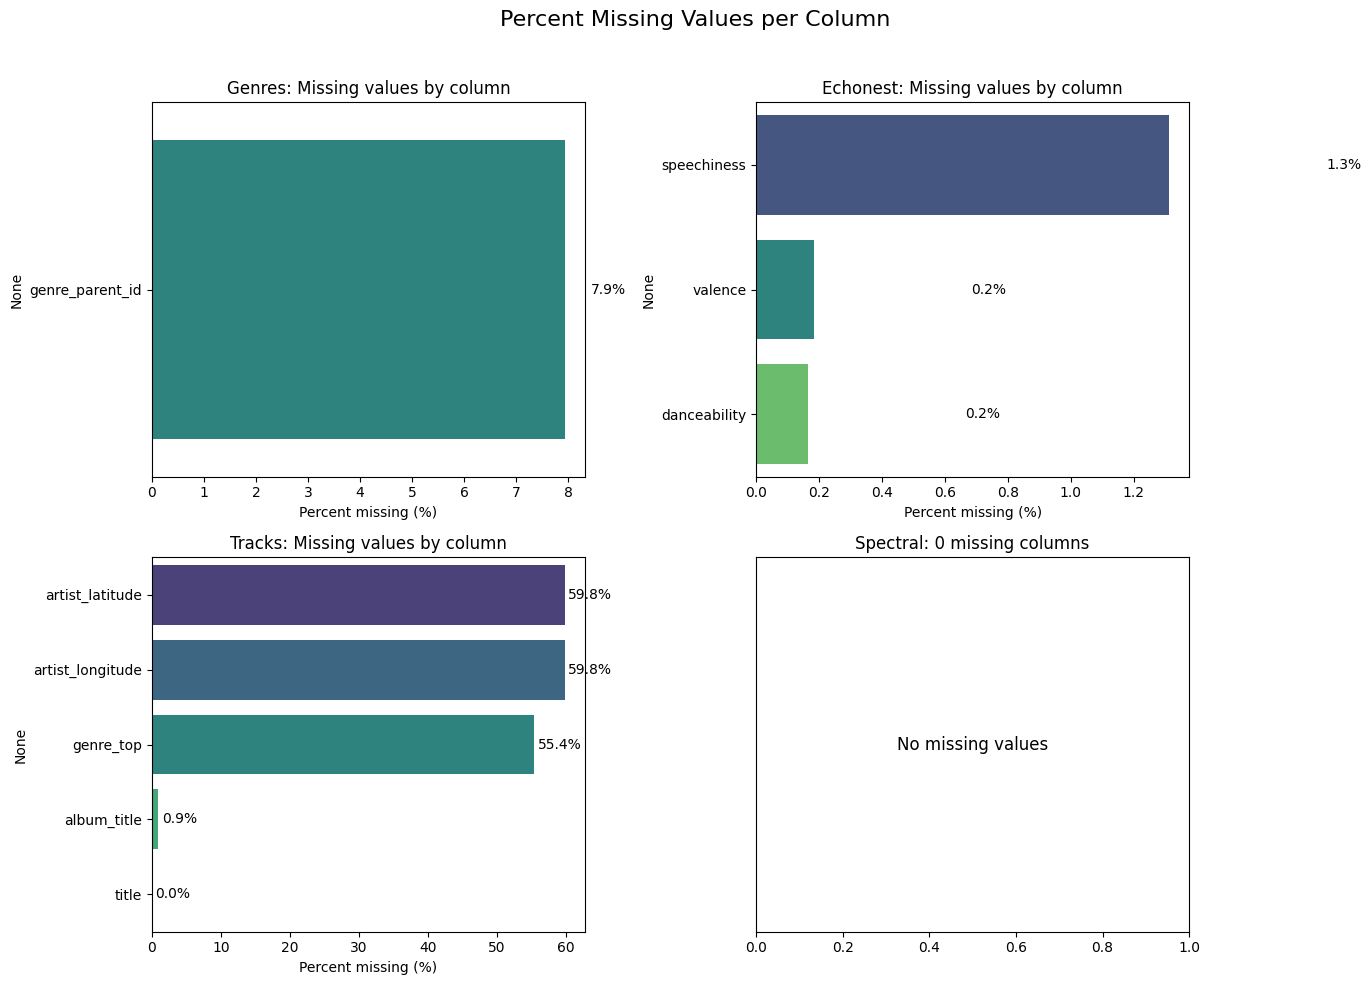

In [3]:
# Explore different datasets
# Load the genres dataset
genres_path = os.path.join('data', 'genres.csv')
genres = pd.read_csv(genres_path)

echonest_path = os.path.join('data', 'echonest_features.tsv')
echonest = pd.read_csv(echonest_path, sep='\t')

tracks_path = os.path.join('data', 'tracks.tsv')
tracks = pd.read_csv(tracks_path, sep='\t')

spectral_path = os.path.join('data', 'spectral_features.tsv')
spectral = pd.read_csv(spectral_path, sep='\t')

genres_n_features = genres.shape[1] - 1  # Exclude the label column
genres_n_lines = genres.shape[0]

print(f"Genres dataset has {genres_n_lines} lines and {genres_n_features} features.")

echonest_n_features = echonest.shape[1] - 1
echonest_n_lines = echonest.shape[0]

print(f"Echonest dataset has {echonest_n_lines} lines and {echonest_n_features} features.")

tracks_n_features = tracks.shape[1] - 1
tracks_n_lines = tracks.shape[0]

print(f"Tracks dataset has {tracks_n_lines} lines and {tracks_n_features} features.")

spectral_n_features = spectral.shape[1] - 1
spectral_n_lines = spectral.shape[0]

print(f"Spectral dataset has {spectral_n_lines} lines and {spectral_n_features} features.")


# Explore the NA values 
na_counts = genres.isna().sum()
print("NA values in each column of genres dataset:")
print(na_counts[na_counts > 0])

na_counts_echonest = echonest.isna().sum()
print("NA values in each column of echonest dataset:")
print(na_counts_echonest[na_counts_echonest > 0])

na_counts_tracks = tracks.isna().sum()
print("NA values in each column of tracks dataset:")
print(na_counts_tracks[na_counts_tracks > 0])       

na_counts_spectral = spectral.isna().sum()
print("NA values in each column of spectral dataset:")
print(na_counts_spectral[na_counts_spectral > 0])

# Clearer plots for missing values: percent missing per column
datasets = {'Genres': genres, 'Echonest': echonest, 'Tracks': tracks, 'Spectral': spectral}
plt.figure(figsize=(14, 10))
for i, (name, df) in enumerate(datasets.items(), 1):
    plt.subplot(2, 2, i)
    # percent of missing values by column (0-100)
    na_pct = df.isna().mean() * 100
    na_pct = na_pct[na_pct > 0].sort_values(ascending=False)
    if na_pct.empty:
        plt.text(0.5, 0.5, 'No missing values', ha='center', va='center', fontsize=12)
        plt.title(f'{name}: 0 missing columns')
        plt.xlabel('')
        plt.yticks([])
    else:
        sns.barplot(x=na_pct.values, y=na_pct.index, palette='viridis')
        plt.xlabel('Percent missing (%)')
        plt.title(f'{name}: Missing values by column')
        # annotate bars with percent values
        for j, v in enumerate(na_pct.values):
            plt.text(v + 0.5, j, f'{v:.1f}%', va='center')
plt.suptitle('Percent Missing Values per Column', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [4]:
# TON CODE EXISTANT (chargement + NA analysis) - parfait !
# ... tout ton code jusqu'au plt.show() ...

# ✅ ENSUITE, ajoute le code de vérification genres/genres_all
print("\n=== VÉRIFICATION genres ⊆ genres_all ===")

# Méthode rapide (1 ligne)
print("genres_all toujours plus long ou égal que genres ?")
print((tracks['genres_all'].str.len() >= tracks['genres'].str.len()).all())

# Méthode détaillée
def check_inclusion(row):
    genres_list = eval(row['genres'])
    genres_all_list = eval(row['genres_all'])
    missing = set(genres_list) - set(genres_all_list)
    return len(missing) == 0

tracks['valid'] = tracks.apply(check_inclusion, axis=1)
print(f"✅ {tracks['valid'].sum()} lignes OK")
print(f"❌ {tracks[~tracks['valid']].shape[0]} lignes PROBLEM")



=== VÉRIFICATION genres ⊆ genres_all ===
genres_all toujours plus long ou égal que genres ?
False
✅ 99995 lignes OK
❌ 0 lignes PROBLEM


In [ ]:
# IDs des genres parents
root_ids = genres[genres["genre_parent_id"].isna()]["genre_id"].tolist()

# Titres des genres parents
root_titles = genres[genres["genre_parent_id"].isna()]["genre_title"].tolist()
genre_top_valid = tracks["genre_top"].dropna().unique().tolist()
# mapping titre → id
title_to_id = genres.set_index("genre_title")["genre_id"].to_dict()

# Quels titres ne sont PAS des parents ?
invalid_titles = [
    g for g in genre_top_valid 
    if title_to_id.get(g) not in root_ids
]
print("Genres parents (titres) :", root_titles)
print("Genres trouvés dans genre_top :", genre_top_valid)
print("Genres NON parents :", invalid_titles)


Genres parents (titres) : ['International', 'Blues', 'Jazz', 'Classical', 'Pop', 'Rock', 'Easy Listening', 'Electronic', 'Folk', 'Spoken', 'Hip-Hop', 'Experimental', 'Instrumental']
Genres trouvés dans genre_top : ['Hip-Hop', 'Rock', 'Electronic', 'Pop', 'International', 'Experimental', 'Blues', 'Jazz', 'Folk', 'Country', 'Spoken', 'Classical', 'Instrumental', 'Old-Time / Historic', 'Soul-RnB', 'Easy Listening']
Genres NON parents : ['Country', 'Old-Time / Historic', 'Soul-RnB']


In [10]:
unique_genres = genres["genre_title"].dropna().unique().tolist()

print("Noms de genres uniques :", unique_genres)
print("Nombre total de genres uniques :", len(unique_genres))

Noms de genres uniques : ['Avant-Garde', 'International', 'Blues', 'Jazz', 'Classical', 'Novelty', 'Comedy', 'Old-Time / Historic', 'Country', 'Pop', 'Disco', 'Rock', 'Easy Listening', 'Soul-RnB', 'Electronic', 'Sound Effects', 'Folk', 'Soundtrack', 'Funk', 'Spoken', 'Hip-Hop', 'Audio Collage', 'Punk', 'Post-Rock', 'Lo-Fi', 'Field Recordings', 'Metal', 'Noise', 'Psych-Folk', 'Krautrock', 'Jazz: Vocal', 'Experimental', 'Electroacoustic', 'Ambient Electronic', 'Radio Art', 'Loud-Rock', 'Latin America', 'Drone', 'Free-Folk', 'Noise-Rock', 'Psych-Rock', 'Bluegrass', 'Electro-Punk', 'Radio', 'Indie-Rock', 'Industrial', 'No Wave', 'Free-Jazz', 'Experimental Pop', 'French', 'Reggae - Dub', 'Afrobeat', 'Nerdcore', 'Garage', 'Indian', 'New Wave', 'Post-Punk', 'Sludge', 'African', 'Freak-Folk', 'Jazz: Out', 'Progressive', 'Alternative Hip-Hop', 'Death-Metal', 'Middle East', 'Singer-Songwriter', 'Ambient', 'Hardcore', 'Power-Pop', 'Space-Rock', 'Polka', 'Balkan', 'Unclassifiable', 'Europe', 'Amer

In [64]:
print(tracks['genre_top'].nunique())
print(len(tracks))
print(tracks['genre_top'].isna().sum())


16
99995
55362


In [49]:
from collections import Counter

# Filtrer 1000 lignes où genre_top n'est pas NA
sample_tracks = tracks[tracks["genre_top"].notna()].tail(1000).copy()

# Fonction pour remonter un genre jusqu'au parent racine
def get_root_parent(gid):
    parent = parent_map.get(gid)
    if pd.isna(parent) or parent is None:
        return gid
    while parent_map.get(parent) not in [None, float('nan')]:
        parent = parent_map.get(parent)
    return parent

# Aplatir tous les genres_all du sample pour calculer la fréquence globale des parents
all_roots = [get_root_parent(gid) 
             for sublist in sample_tracks["genres_all"] for gid in sublist if gid is not None]

root_freq = Counter(all_roots)

# Vérifier si genre_top correspond au parent le plus fréquent
def top_matches_most_frequent(row):
    roots = [get_root_parent(gid) for gid in row["genres_all"] if gid is not None]
    if not roots:
        return None
    best = max(roots, key=lambda gid: root_freq[gid])
    best_name = title_map.get(best)
    return row["genre_top"] == best_name

# Appliquer sur le sample
sample_tracks["top_matches_most_frequent"] = sample_tracks.apply(top_matches_most_frequent, axis=1)

# Résultat : combien correspondent / ne correspondent pas
print(sample_tracks["top_matches_most_frequent"].value_counts())

# Filtrer les lignes où genre_top ne correspond pas au parent le plus fréquent
mismatch_tracks = sample_tracks[sample_tracks["top_matches_most_frequent"] == True]

# Afficher les colonnes demandées
print(mismatch_tracks[["track_id", "genre_top", "genres", "genres_all"]])


top_matches_most_frequent
False    557
True     443
Name: count, dtype: int64
       track_id   genre_top          genres           genres_all
97856    151974  Electronic            [15]                 [15]
97857    151975  Electronic            [15]                 [15]
97858    151976  Electronic            [15]                 [15]
97859    151977  Electronic            [15]                 [15]
97860    151978  Electronic            [15]                 [15]
...         ...         ...             ...                  ...
99899    155200  Electronic            [42]             [42, 15]
99900    155201  Electronic            [42]             [42, 15]
99901    155202  Electronic            [42]             [42, 15]
99902    155203  Electronic            [42]             [42, 15]
99936    155244  Electronic  [15, 240, 468]  [240, 297, 468, 15]

[443 rows x 4 columns]


In [58]:
from collections import Counter

# 1) Sample
sample_tracks = tracks[tracks["genre_top"].notna()].tail(2000).copy()

# 2) Remonter jusqu'au parent racine
def get_root_parent(gid):
    parent = parent_map.get(gid)
    if pd.isna(parent) or parent is None:
        return gid
    while parent_map.get(parent) not in [None, float('nan')]:
        parent = parent_map.get(parent)
    return parent

# 3) Fréquence globale des parents racines
all_roots = [
    get_root_parent(gid)
    for sublist in sample_tracks["genres_all"]
    for gid in sublist
    if gid is not None
]
root_freq = Counter(all_roots)

# 4) Règle 1 : genre_top == parent le plus fréquent
def top_matches_most_frequent(row):
    roots = [get_root_parent(gid) for gid in row["genres_all"] if gid is not None]
    if not roots:
        return None
    best = max(roots, key=lambda gid: root_freq[gid])
    best_name = title_map.get(best)
    return row["genre_top"] == best_name

sample_tracks["top_matches_most_frequent"] = sample_tracks.apply(
    top_matches_most_frequent, axis=1
)

print("Règle 1 (parent le plus fréquent) :")
print(sample_tracks["top_matches_most_frequent"].value_counts())

# 5) Règle 2 : parmi les genres_all, un genre racine a le même titre que genre_top
def root_in_genres_all_matches_top(row):
    # prendre seulement les genres racines présents dans genres_all
    roots_in_all = [gid for gid in row["genres_all"] if gid in root_genres]
    if not roots_in_all:
        return None
    # True si au moins un de ces roots a le même titre que genre_top
    for gid in roots_in_all:
        root_name = title_map.get(gid)
        if root_name == row["genre_top"]:
            return True
    return False

# On applique la règle 2 SEULEMENT sur les lignes où la règle 1 est False
false_tracks = sample_tracks[sample_tracks["top_matches_most_frequent"] == False].copy()
false_tracks["root_rule_ok"] = false_tracks.apply(
    root_in_genres_all_matches_top, axis=1
)

print("\nRègle 2 (un parent racine dans genres_all = genre_top) sur les FALSE de la règle 1 :")
print(false_tracks["root_rule_ok"].value_counts(dropna=False))

# Pour inspecter quelques cas
print("\nExemples :")
print(false_tracks[["track_id", "genre_top", "genres", "genres_all", "root_rule_ok"]].head(10))


Règle 1 (parent le plus fréquent) :
top_matches_most_frequent
False    1043
True      957
Name: count, dtype: int64

Règle 2 (un parent racine dans genres_all = genre_top) sur les FALSE de la règle 1 :
root_rule_ok
True    1043
Name: count, dtype: int64

Exemples :
       track_id     genre_top    genres genres_all  root_rule_ok
95473    148464  Experimental  [32, 38]   [32, 38]          True
95474    148465  Experimental  [32, 38]   [32, 38]          True
95475    148466  Experimental  [32, 38]   [32, 38]          True
95476    148467  Experimental  [32, 38]   [32, 38]          True
95477    148468  Experimental  [32, 38]   [32, 38]          True
95478    148469  Experimental  [32, 38]   [32, 38]          True
95497    148488     Classical     [659]   [659, 5]          True
95498    148489     Classical     [659]   [659, 5]          True
95499    148490     Classical     [659]   [659, 5]          True
95500    148491          Rock      [66]   [66, 12]          True


In [53]:
root_genres = set(genres.loc[genres['genre_parent_id'].isna(), 'genre_id'])
def has_root_in_genres_all(row):
    return any(gid in root_genres for gid in row['genres_all'])
sample = tracks[tracks['genre_top'].notna()].tail(100).copy()
sample['has_root_in_genres_all'] = sample.apply(has_root_in_genres_all, axis=1)
print(sample['has_root_in_genres_all'].value_counts())



has_root_in_genres_all
True    100
Name: count, dtype: int64


In [44]:
from collections import Counter

# Filtrer les lignes où genre_top est NaN
missing_top = tracks[tracks["genre_top"].isna()].tail(1000).copy()

# Fonction pour remonter un genre à son parent racine
def get_root_parent(gid):
    parent = parent_map.get(gid)
    if pd.isna(parent) or parent is None:
        return gid
    while parent_map.get(parent) not in [None, float('nan')]:
        parent = parent_map.get(parent)
    return parent

# Fonction pour vérifier si les parents ont un parent commun
def check_common_parent(row):
    roots = [get_root_parent(gid) for gid in row["genres_all"] if gid is not None]
    if not roots:
        return None  # pas de genres
    count = Counter(roots)
    most_common, freq = count.most_common(1)[0]
    total = sum(count.values())
    # Retourne True si un parent représente >50% des genres (commun)
    return freq / total > 0.5

# Appliquer la vérification
missing_top["has_common_parent"] = missing_top.apply(check_common_parent, axis=1)

# Résultat
print(missing_top["has_common_parent"].value_counts(dropna=False))
# Filtrer la ligne avec parent commun
true_parent_row = missing_top[missing_top["has_common_parent"] == True]

# Afficher uniquement les colonnes demandées
print(true_parent_row[["track_id","genre_top", "genres", "genres_all"]])




has_common_parent
False    935
True      40
None      25
Name: count, dtype: int64
       track_id genre_top              genres  \
98705    153762       NaN          [103, 137]   
98706    153763       NaN          [103, 137]   
98707    153764       NaN          [103, 137]   
98708    153765       NaN          [103, 137]   
98709    153766       NaN          [103, 137]   
98710    153767       NaN          [103, 137]   
98711    153768       NaN          [103, 137]   
98712    153769       NaN          [103, 137]   
98713    153770       NaN          [103, 137]   
98714    153771       NaN          [103, 137]   
98715    153772       NaN          [103, 137]   
98716    153773       NaN          [103, 137]   
98717    153774       NaN          [103, 137]   
99177    154351       NaN       [11, 19, 182]   
99187    154361       NaN       [11, 19, 182]   
99195    154369       NaN  [10, 17, 103, 137]   
99427    154637       NaN  [47, 53, 101, 167]   
99428    154638       NaN  [47, 53,

In [70]:
tracks_labeled = tracks[tracks["genre_top"].notna()].copy()
print(tracks.shape, "→", tracks_labeled.shape)
title_to_id = dict(zip(genres["genre_title"], genres["genre_id"]))
tracks_labeled["genre_top_id"] = tracks_labeled["genre_top"].map(title_to_id)
df_task1 = (tracks_labeled
            .merge(spectral, on="track_id", how="left")
            .merge(echonest, on="track_id", how="left"))
print(df_task1.shape)
y = df_task1["genre_top_id"]

X = df_task1.select_dtypes(include=[np.number]).drop(
    columns=["genre_top_id", "track_id"], errors="ignore"
)
print(X.shape, y.nunique())
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    n_jobs=-1,
    random_state=0
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


(99995, 16) → (44633, 16)
(44633, 46)
(44633, 36) 16
              precision    recall  f1-score   support

           2       0.88      0.17      0.28       251
           3       1.00      0.12      0.22        16
           4       0.92      0.12      0.22        97
           5       0.87      0.77      0.82       226
           8       0.90      0.91      0.90        98
           9       1.00      0.06      0.12        32
          10       0.98      0.21      0.34       447
          12       0.65      0.80      0.71      2417
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00        26
          15       0.61      0.72      0.66      1754
          17       0.65      0.37      0.47       475
          20       0.92      0.17      0.29        65
          21       0.71      0.51      0.60       667
          38       0.64      0.79      0.71      1950
        1235       0.64      0.45      0.53       401

    accuracy               

C:\Users\ajarr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ajarr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ajarr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_clas

In [15]:
from collections import Counter

# --- Étape 1 : remonter un genre jusqu'à son parent racine ---
def get_root_parent(gid):
    parent = parent_map.get(gid)
    if pd.isna(parent) or parent is None:
        return gid  # si pas de parent, c'est déjà la racine
    while parent_map.get(parent) not in [None, float('nan')]:
        parent = parent_map.get(parent)
    return parent

# --- Étape 2 : choisir le parent racine le plus fréquent pour la ligne ---
def impute_genre_top(row):
    # s'assurer que genres_all existe et n'est pas vide
    genres_list = row.get("genres_all", [])
    if not genres_list:
        return row.get("genre_top")  # on garde ce qui existe

    # remonter tous les genres à leur parent racine
    roots = [get_root_parent(gid) for gid in genres_list if gid is not None]

    if not roots:
        return row.get("genre_top")  # pas de genres valides

    # parent racine le plus fréquent
    most_common_root = Counter(roots).most_common(1)[0][0]

    # sécuriser l'accès à genre_top et au mapping title_map
    current_top = row.get("genre_top")
    imputed = title_map.get(most_common_root, None)

    return current_top if pd.notnull(current_top) else imputed

# --- Étape 3 : appliquer à tout le dataset ---
tracks["genre_top_imputed"] = tracks.apply(impute_genre_top, axis=1)

# --- Vérifier quelques résultats ---
print(tracks[["genre_top", "genres_all", "genre_top_imputed"]].head(10))


KeyboardInterrupt: 

In [8]:
import pandas as pd
import ast
from collections import Counter


# ---------------------------
# 1. Préparer la table genres
# ---------------------------

# Dictionnaire : genre_id -> parent_id
parent_map = genres.set_index("genre_id")["genre_parent_id"].to_dict()

# Dictionnaire : genre_id -> genre_title
title_map = genres.set_index("genre_id")["genre_title"].to_dict()



# ---------------------------
# 2. Fonctions utilitaires
# ---------------------------

def get_root_parent(gid):
    """
    Remonte la hiérarchie des genres jusqu'au parent "racine".
    Si genre_parent_id est None => c'est la racine.
    """
    parent = parent_map.get(gid)

    # Si pas de parent : genre racine
    if pd.isna(parent) or parent is None:
        return gid

    # Tant qu'il existe un parent, remonter
    while parent_map.get(parent) not in [None, float('nan')]:
        parent = parent_map.get(parent)

    return parent


def to_list(x):
    """
    Convertit une chaîne type "[12, 58]" en vraie liste.
    Si erreur => retourne une liste vide.
    """
    try:
        return ast.literal_eval(x)
    except:
        return []



# ---------------------------
# 3. Nettoyage des colonnes
# ---------------------------

# Harmoniser les noms de colonnes pour éviter les KeyError
tracks.columns = tracks.columns.str.strip()

if "genres_all" not in tracks.columns:
    raise ValueError(f"La colonne 'genres_all' n'existe pas. Colonnes disponibles : {tracks.columns.tolist()}")

# Convertir la colonne genres_all en vraie liste
tracks["genres_all_list"] = tracks["genres_all"].apply(to_list)



# ---------------------------
# 4. Extraire les parents racines pour chaque ligne
# ---------------------------

tracks["root_parents"] = tracks["genres_all_list"].apply(
    lambda lst: [get_root_parent(gid) for gid in lst]
)



# ---------------------------
# 5. Calcul des fréquences globales des genres racines
# ---------------------------

all_roots = [gid for sub in tracks["root_parents"] for gid in sub]
root_freq = Counter(all_roots)



# ---------------------------
# 6. Fonction pour imputer genre_top
# ---------------------------

def most_frequent_root(row):
    """
    Si genre_top existe -> on utilise la valeur existante.
    Sinon -> prendre le parent racine le plus fréquent
    dans root_parents de la ligne.
    """
    # Si genre_top est déjà renseigné, on garde
    if pd.notnull(row["genre_top"]) and row["genre_top"] != "":
        return row["genre_top"]

    roots = row["root_parents"]

    # Si aucun genre disponible
    if len(roots) == 0:
        return None

    # Choisir le root avec la plus grande fréquence globale
    best = max(roots, key=lambda gid: root_freq[gid])

    return title_map.get(best)



# ---------------------------
# 7. Imputation finale
# ---------------------------

tracks["genre_top_imputed"] = tracks.apply(most_frequent_root, axis=1)


KeyboardInterrupt: 